In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [35]:
# biba_games_count_df.rename(columns={'index': 'Feature', 'count': 'Fill_rate'}, inplace = True)

## Summary

- 67 numerical Numerical features out of 246 have less than 10% fill rate
- Top 50 numerical features with low fill rate as percentage % as shown below

In [39]:
# biba_games_count_df.sort_values('Fill_rate').head(50)

,Feature,Fill_rate
213,historic_count_tube,0.079808
198,historic_count_overhang,0.119713
201,historic_count_pull_under,0.119713
209,historic_count_spinner,0.119713
184,historic_count_in_crawls_90tube,0.199521
216,historic_count_zipline,0.239425
188,historic_count_in_obsta_ball,0.239425
191,historic_count_in_obsta_punchbag,0.239425
189,historic_count_in_obsta_horiz_squeeze,0.279330
185,historic_count_in_crawls_cave,0.319234


## Summary contd...

- Probable option is to drop some columns with say < 5% fill rate as they doesn't provide much value by imputing
- Categorical features:
    - Drop the columns `name` and `date`
    - `monthly_weekday_counts` and `monthly_survey` should be segregated into separate columns as they are list of dictionaries
- **Correlation**
    - `Target` i.e. number of sessions has very correlation with any other feature. This is a good sign
    - Below are the features with > 10 number of high correlation with other features. *high correlation : >=0.8 | <=-0.8* 
    -  These 36 columns have quite high correlation among each other. Specially in the `historic_` columns. 
    - Keeping all will affect the model.
    - Also Use of one equipment might be related with other equipments as per `game design`.

In [40]:
# df_high_corr_features

,Feature,number of correlated features
0,historic_number_of_sessions,37
1,historic_unique_sessions,31
2,historic_repeat_sessions,26
3,historic_total_session_length,33
4,historic_hour_10,16
5,historic_hour_11,15
6,historic_hour_12,20
7,historic_hour_13,20
8,historic_hour_14,25
9,historic_hour_15,23


## Summary contd ..

- It can be concluded that many columns giving count of sessions are correlated which is predictable. They can be removed or combined
- **0 values**
    - 151 columns out of 246 have 90 percentile value > 0
    - 115 columns have 90 percentile values = 0
    - Scaling of all values are necessary to run any model
- **Coefficient of variance**
    - Many oclumns have very high std_dev than their mean.
    - Below table shows the ratio of std_dev by mean for those >10

In [61]:
# Cov_df

,Feature_name,Std_dev / mean
0,monthly_count_climber_rope,12.844336
1,monthly_count_slide_covered,12.041672
2,monthly_count_slide,82.495791
3,monthly_count_tube,223.874965
4,monthly_count_climber_rock,17.043263
5,monthly_count_slide_spiral,11.172593
6,monthly_count_slide_roller,18.704180
7,monthly_count_ramp,125.147163
8,monthly_count_zipline,129.251692
9,monthly_count_spinner,158.301927


## Final Comments

- The `history_` columns seems to have pretty low fill rate
- This might explain their high correlation since most values are missing or 0
- The `monthly_` columns have very high std dev compared to mean.
- This means there are lot of outliers and the fill rate is good.

In [2]:
df = pd.read_csv("../data/train_data.zip")

df.head()

,external_id,month,year,monthly_number_of_sessions,monthly_unique_sessions,monthly_repeated_sessions,monthly_avg_length_of_session,monthly_avg_light_activity,monthly_avg_moderate_activity,monthly_avg_vigorous_activity,...,avg_wind_9_10,avg_wind_10_11,avg_wind_11_12,avg_wind_12_above,perfect_days,unacast_session_count,hpi,state_and_local_amount_per_capita,state_amount_per_capita,local_amount_per_capita
0,1900203,3,2019,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,78.0,323.61,0.132207,0.018519,0.113688
1,1900203,6,2018,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,111.0,323.61,0.132207,0.018519,0.113688
2,1900203,8,2018,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,110.0,323.61,0.132207,0.018519,0.113688
3,MR00101775,1,2019,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,110.38,0.076247,0.011966,0.064281
4,MR00101775,8,2019,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,110.38,0.076247,0.011966,0.064281


In [17]:
df.shape

(50120, 861)

In [3]:
#checking the time span of data

(df['month'].astype(str)+"-"+df['year'].astype(str)).unique()

array(['3-2019', '6-2018', '8-2018', '1-2019', '8-2019', '5-2018',
       '11-2018', '5-2019', '4-2018', '7-2018', '9-2019', '7-2019',
       '9-2018', '2-2019', '10-2018', '6-2019', '2-2018', '3-2018',
       '4-2019', '12-2018'], dtype=object)

In [5]:
df.describe()

,month,year,monthly_number_of_sessions,monthly_unique_sessions,monthly_repeated_sessions,monthly_avg_length_of_session,monthly_avg_light_activity,monthly_avg_moderate_activity,monthly_avg_vigorous_activity,monthly_count_slide_single,...,avg_wind_9_10,avg_wind_10_11,avg_wind_11_12,avg_wind_12_above,perfect_days,unacast_session_count,hpi,state_and_local_amount_per_capita,state_amount_per_capita,local_amount_per_capita
count,52626.000000,52626.000000,52626.000000,52626.000000,52626.000000,5.262600e+04,5.262600e+04,5.262600e+04,5.262600e+04,52626.000000,...,52625.000000,52625.000000,52625.000000,52625.000000,48488.000000,49967.000000,52626.000000,52626.000000,52626.000000,52626.000000
mean,5.857143,2018.428571,3.300536,0.423878,2.876658,7.973544e+04,2.310989e+04,1.588123e+04,3.119375e+03,0.615133,...,0.009216,0.003420,0.001368,0.001159,1.775223,135.281086,363.333280,0.142607,0.017662,0.124945
std,3.196542,0.494876,17.406950,1.907174,15.755926,2.885052e+05,1.068163e+05,7.419752e+04,2.899730e+04,2.858669,...,0.114052,0.068286,0.039451,0.035126,2.974338,534.126771,268.135357,0.053920,0.012470,0.052613
min,1.000000,2018.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,62.050000,0.070614,0.000000,0.037019
25%,3.000000,2018.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,205.510000,0.094705,0.008126,0.086578
50%,6.000000,2018.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000,272.325000,0.132207,0.012953,0.113688
75%,8.000000,2019.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,123.000000,417.420000,0.164303,0.024017,0.151351
max,12.000000,2019.000000,1788.000000,95.000000,1693.000000,5.390389e+06,4.643550e+06,3.124310e+06,1.598000e+06,150.000000,...,4.000000,4.000000,3.000000,2.000000,27.000000,44860.000000,2299.780000,0.485204,0.063809,0.443315


In [5]:
biba_games = pd.DataFrame()
biba_games = pd.concat([df.iloc[:, 0:132],df.iloc[:, 673:793]], axis = 1)
biba_games['target'] = df['unacast_session_count']

In [6]:
biba_games.shape

(50120, 253)

In [29]:
# getting fill rates of numerical columns less than 10 %
biba_games_count = biba_games.describe().loc['count', :]

biba_games_count = (biba_games_count / df.shape[0])*100
biba_games_count_df = biba_games_count.reset_index()

,index,count
0,month,100.000000
1,year,100.000000
2,monthly_number_of_sessions,100.000000
3,monthly_unique_sessions,100.000000
4,monthly_repeated_sessions,100.000000
...,...,...
243,historic_rain,64.485235
244,historic_clear,64.485235
245,historic_foggy,64.485235
246,historic_snow,64.485235


In [20]:
print("Number of columns with low fill rate : ", len(biba_games_count[biba_games_count < 0.1*df.shape[0]]))
print("Low fill rate : ", max(biba_games_count[biba_games_count < 0.1*df.shape[0]]) / df.shape[0] * 100, " %")


Number of columns with low fill rate :  67
Low fill rate :  9.896249002394255  %


In [10]:
#dropping numerical columns with low fill rate
# biba_games = biba_games.drop(columns = list(biba_games_count[biba_games_count < 0.5*df.shape[0]].index))
# biba_games.head()

,external_id,month,year,monthly_number_of_sessions,monthly_unique_sessions,monthly_repeated_sessions,monthly_avg_length_of_session,monthly_avg_light_activity,monthly_avg_moderate_activity,monthly_avg_vigorous_activity,...,monthly_hour_21,monthly_hour_22,monthly_hour_23,monthly_weekday_counts,monthly_survey,monthly_count_of_holidays,name,date,distance_to_nearest_bus_stop,target
0,1900203,3,2019,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,NaN,NaN,0,NaN,NaN,338.94,78.0
1,1900203,6,2018,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,NaN,NaN,0,NaN,NaN,338.94,111.0
2,1900203,8,2018,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,NaN,NaN,0,NaN,NaN,338.94,110.0
3,MR00101775,1,2019,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,NaN,NaN,0,NaN,NaN,48486.39,10.0
4,MR00101775,8,2019,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,NaN,NaN,0,NaN,NaN,48486.39,11.0


In [8]:
# Checking categorical features
numerical_features = pd.DataFrame()
categorical_features = pd.DataFrame()

categorical_features = biba_games.loc[:, biba_games.dtypes == "object"]
numerical_features = biba_games.loc[:, biba_games.dtypes != "object"]

In [9]:
#Excluding external_id from categorical features
categorical_features = categorical_features.iloc[:, 1:]
categorical_features

,monthly_weekday_counts,monthly_survey,name,date
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
50115,NaN,NaN,NaN,NaN
50116,NaN,NaN,NaN,NaN
50117,NaN,NaN,NaN,NaN
50118,NaN,NaN,NaN,NaN


In [13]:
categorical_features.count()

monthly_weekday_counts    4912
monthly_survey            4912
name                      1358
date                      1358
dtype: int64

## Possible solution for low fill rate in categorical columns
- Delete the columns `name` and `date`
- `monthly_weekday_counts` and `monthly_survey` should be segregated into separate columns as they are list of dictionaries

In [10]:
biba_games = biba_games.drop(columns = list(categorical_features.columns))
biba_games.head()

,external_id,month,year,monthly_number_of_sessions,monthly_unique_sessions,monthly_repeated_sessions,monthly_avg_length_of_session,monthly_avg_light_activity,monthly_avg_moderate_activity,monthly_avg_vigorous_activity,...,historic_ws_8_to_10,historic_ws_10_to_12,historic_ws_12_to_14,historic_ws_14_to_16,historic_ws_above_16,historic_rain,historic_clear,historic_foggy,historic_snow,target
0,1900203,3.0,2019.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0
1,1900203,6.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0
2,1900203,8.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0
3,MR00101775,1.0,2019.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
4,MR00101775,8.0,2019.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0


In [10]:
#Dropping month and year from numerical features as they are part of primary key
numerical_features = numerical_features.iloc[:, 2:]
numerical_features

,monthly_number_of_sessions,monthly_unique_sessions,monthly_repeated_sessions,monthly_avg_length_of_session,monthly_avg_light_activity,monthly_avg_moderate_activity,monthly_avg_vigorous_activity,monthly_count_slide_single,monthly_count_climber_rope,monthly_count_slide_covered,...,historic_ws_8_to_10,historic_ws_10_to_12,historic_ws_12_to_14,historic_ws_14_to_16,historic_ws_above_16,historic_rain,historic_clear,historic_foggy,historic_snow,target
0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,78.0
1,0,0,0,0.0,0.0,0.0,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,111.0
2,0,0,0,0.0,0.0,0.0,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,110.0
3,0,0,0,0.0,0.0,0.0,0.0,0,0,0,...,4.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,10.0
4,0,0,0,0.0,0.0,0.0,0.0,0,0,0,...,4.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50115,0,0,0,0.0,0.0,0.0,0.0,0,0,0,...,7.0,4.0,6.0,1.0,4.0,5.0,23.0,5.0,0.0,30.0
50116,0,0,0,0.0,0.0,0.0,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
50117,0,0,0,0.0,0.0,0.0,0.0,0,0,0,...,7.0,1.0,1.0,1.0,NaN,1.0,13.0,1.0,0.0,45.0
50118,0,0,0,0.0,0.0,0.0,0.0,0,0,0,...,NaN,1.0,NaN,NaN,NaN,0.0,4.0,1.0,0.0,14.0


In [11]:
num_cor_matrix = numerical_features.corr()
num_cor_matrix

,monthly_number_of_sessions,monthly_unique_sessions,monthly_repeated_sessions,monthly_avg_length_of_session,monthly_avg_light_activity,monthly_avg_moderate_activity,monthly_avg_vigorous_activity,monthly_count_slide_single,monthly_count_climber_rope,monthly_count_slide_covered,...,historic_ws_8_to_10,historic_ws_10_to_12,historic_ws_12_to_14,historic_ws_14_to_16,historic_ws_above_16,historic_rain,historic_clear,historic_foggy,historic_snow,target
monthly_number_of_sessions,1.000000,0.877738,0.998331,0.539581,0.410346,0.392229,0.205674,0.910002,0.712838,0.544078,...,0.353141,0.314617,0.305573,0.256568,0.201699,0.330710,0.401153,0.238246,0.030656,0.000870
monthly_unique_sessions,0.877738,1.000000,0.848605,0.557417,0.408394,0.415142,0.204321,0.935588,0.456479,0.398124,...,0.458886,0.411567,0.408811,0.345043,0.277931,0.421208,0.500329,0.302029,0.028150,-0.002436
monthly_repeated_sessions,0.998331,0.848605,1.000000,0.528581,0.403850,0.383033,0.202463,0.891991,0.732041,0.552744,...,0.334547,0.297762,0.288115,0.241689,0.189188,0.314340,0.382566,0.226622,0.030445,0.001254
monthly_avg_length_of_session,0.539581,0.557417,0.528581,1.000000,0.859077,0.831047,0.421830,0.584631,0.256255,0.267688,...,0.283934,0.243049,0.248011,0.202026,0.170165,0.284060,0.345213,0.204058,0.027552,0.002301
monthly_avg_light_activity,0.410346,0.408394,0.403850,0.859077,1.000000,0.806619,0.295282,0.434817,0.198737,0.209668,...,0.202819,0.173353,0.180743,0.140959,0.120567,0.206996,0.248387,0.147476,0.022715,0.004689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
historic_rain,0.330710,0.421208,0.314340,0.284060,0.206996,0.220870,0.107162,0.403957,0.153671,0.143750,...,0.755211,0.706793,0.745265,0.638628,0.467834,1.000000,0.720764,0.325666,0.075327,0.013186
historic_clear,0.401153,0.500329,0.382566,0.345213,0.248387,0.268449,0.114578,0.462530,0.177996,0.191996,...,0.892110,0.816309,0.807110,0.698547,0.591251,0.720764,1.000000,0.505651,0.055405,-0.004717
historic_foggy,0.238246,0.302029,0.226622,0.204058,0.147476,0.166229,0.073375,0.276476,0.069041,0.103065,...,0.492492,0.427587,0.368901,0.216752,0.177258,0.325666,0.505651,1.000000,0.019626,0.085029
historic_snow,0.030656,0.028150,0.030445,0.027552,0.022715,0.015893,0.014175,0.032022,0.006424,0.012668,...,0.067241,0.008395,0.006076,0.022625,0.003978,0.075327,0.055405,0.019626,1.000000,0.028955


In [15]:
# Checking variables with high correlation with target

target_cor = num_cor_matrix.loc['target', :]

target_cor[(target_cor > 0.3) | (target_cor <-0.3)] #This is impressive

historic_count_overhang    0.404984
target                     1.000000
Name: target, dtype: float64

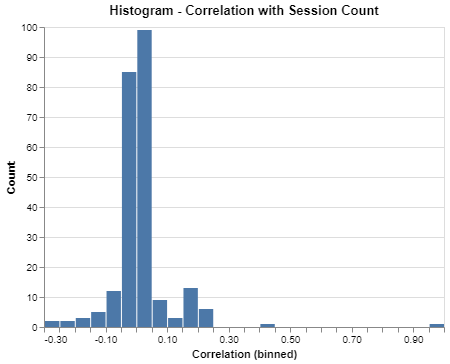

In [18]:
alt.Chart(num_cor_matrix).mark_bar().encode(
    alt.X("target:Q", bin=alt.Bin(maxbins=30),title="Correlation (binned)"),
    y=alt.Y('count()', title="Count")).properties(
    title='Histogram - Correlation with Session Count'
)

In [19]:
#selecting features with high number of correlated features
high_cor_dict = {}

for i in list(num_cor_matrix.columns):
    
    row = num_cor_matrix.loc[i, :]
    high_cor_dict[i] = len(row[((row>=0.8) | (row<=-0.8)) & (row!=1)])

In [28]:
#Showing high correlated features, i.e. features with more than 10 correlated features

feature = []
num_corr_features = []

for key, val in high_cor_dict.items():
    if val > 10:
        feature.append(key)
        num_corr_features.append(high_cor_dict[key]) 
        
df_high_corr_features = pd.DataFrame({'Feature': feature, 'number of correlated features': num_corr_features})

df_high_corr_features

,Feature,number of correlated features
0,historic_number_of_sessions,37
1,historic_unique_sessions,31
2,historic_repeat_sessions,26
3,historic_total_session_length,33
4,historic_hour_10,16
5,historic_hour_11,15
6,historic_hour_12,20
7,historic_hour_13,20
8,historic_hour_14,25
9,historic_hour_15,23


In [36]:
num_cor_matrix.loc[high_cor_list, high_cor_list]

,monthly_number_of_sessions,monthly_unique_sessions,monthly_repeated_sessions,monthly_count_slide_single,monthly_count_climber_step,monthly_count_bridge_plank,monthly_count_swing_seated,monthly_clear
monthly_number_of_sessions,1.000000,0.879418,0.998338,0.910716,0.910295,0.870549,0.878879,0.933147
monthly_unique_sessions,0.879418,1.000000,0.850526,0.936178,0.937035,0.853063,0.849578,0.807096
monthly_repeated_sessions,0.998338,0.850526,1.000000,0.892828,0.892260,0.858513,0.868138,0.933234
monthly_count_slide_single,0.910716,0.936178,0.892828,1.000000,0.972547,0.886264,0.857010,0.843146
monthly_count_climber_step,0.910295,0.937035,0.892260,0.972547,1.000000,0.883973,0.861748,0.845839
monthly_count_bridge_plank,0.870549,0.853063,0.858513,0.886264,0.883973,1.000000,0.797579,0.812053
monthly_count_swing_seated,0.878879,0.849578,0.868138,0.857010,0.861748,0.797579,1.000000,0.825430
monthly_clear,0.933147,0.807096,0.933234,0.843146,0.845839,0.812053,0.825430,1.000000


## Correlation Observations
- These 36 columns have quite high correlation among each other. Specially in the `historic_` columns. 
- Keeping all will affect the model.
- This is evident from the Data description : `monthly_repeated_sessions` = `number of repeated sessions monthly (repeat session = (number of sessions) - (number of unique users) )`
- Also Use of one equipment might be related with other equipments as per `game design`.
- `monthly_clear` can be excluded as it is not related directly to other features 

## Possible solution
- Linear regression to combine these into 1 or less features

In [46]:
# Checking for outliers

quant_check = numerical_features.quantile([0.9, 0.95, 0.975, 0.99, 1])
quant_check.loc[0.9, quant_check.loc[0.9, :] > 0]

total_events_across_state        26257.0
positive_events_across_state      8645.0
negative_events_across_state     17109.0
neutral_events_across_state        542.0
total_mentions_across_state     523330.0
                                  ...   
historic_ws_above_16                 8.0
historic_rain                        8.0
historic_clear                      62.0
historic_foggy                       6.0
target                             259.0
Name: 0.9, Length: 151, dtype: float64

In [42]:
#comparing quantiles
per_90 = quant_check.loc[0.90, :]
per_95 = quant_check.loc[0.95, :]
per_975 = quant_check.loc[0.975, :]
per_99 = quant_check.loc[0.99, :]
per_100 = quant_check.loc[1, :]

numerical_features.loc[:, per_100 > per_99+per_90]

,monthly_number_of_sessions,monthly_unique_sessions,monthly_repeated_sessions,monthly_avg_length_of_session,monthly_avg_light_activity,monthly_avg_moderate_activity,monthly_avg_vigorous_activity,monthly_count_slide_single,monthly_count_climber_rope,monthly_count_slide_covered,...,historic_ws_8_to_10,historic_ws_10_to_12,historic_ws_12_to_14,historic_ws_14_to_16,historic_ws_above_16,historic_rain,historic_clear,historic_foggy,historic_snow,target
0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,78.0
1,0,0,0,0.0,0.0,0.0,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,111.0
2,0,0,0,0.0,0.0,0.0,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,110.0
3,0,0,0,0.0,0.0,0.0,0.0,0,0,0,...,4.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,10.0
4,0,0,0,0.0,0.0,0.0,0.0,0,0,0,...,4.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50115,0,0,0,0.0,0.0,0.0,0.0,0,0,0,...,7.0,4.0,6.0,1.0,4.0,5.0,23.0,5.0,0.0,30.0
50116,0,0,0,0.0,0.0,0.0,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
50117,0,0,0,0.0,0.0,0.0,0.0,0,0,0,...,7.0,1.0,1.0,1.0,NaN,1.0,13.0,1.0,0.0,45.0
50118,0,0,0,0.0,0.0,0.0,0.0,0,0,0,...,NaN,1.0,NaN,NaN,NaN,0.0,4.0,1.0,0.0,14.0


In [43]:
numerical_features.loc[:, per_99 > per_975+per_95]

,monthly_number_of_sessions,monthly_repeated_sessions,monthly_avg_light_activity,monthly_avg_moderate_activity,monthly_avg_vigorous_activity,monthly_count_slide_single,monthly_count_climber_rope,monthly_count_slide_covered,monthly_count_tube_straight,monthly_count_climber_step,...,historic_avg_vigorous_activity,historic_hour_0,historic_count_bridge_rope,historic_count_climber_playcube,historic_count_in_slides_drop,historic_count_swing_tire,historic_cloudy,historic_foggy,historic_snow,target
0,0,0,0.0,0.0,0.0,0,0,0,0,0,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,78.0
1,0,0,0.0,0.0,0.0,0,0,0,0,0,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,111.0
2,0,0,0.0,0.0,0.0,0,0,0,0,0,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,110.0
3,0,0,0.0,0.0,0.0,0,0,0,0,0,...,4166.666667,NaN,NaN,NaN,NaN,NaN,5.0,0.0,0.0,10.0
4,0,0,0.0,0.0,0.0,0,0,0,0,0,...,4166.666667,NaN,NaN,NaN,NaN,NaN,5.0,0.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50115,0,0,0.0,0.0,0.0,0,0,0,0,0,...,2574.468085,NaN,2.0,NaN,NaN,NaN,6.0,5.0,0.0,30.0
50116,0,0,0.0,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
50117,0,0,0.0,0.0,0.0,0,0,0,0,0,...,11956.521739,NaN,NaN,NaN,NaN,NaN,2.0,1.0,0.0,45.0
50118,0,0,0.0,0.0,0.0,0,0,0,0,0,...,2833.333333,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,14.0


## Solution
- Scaling is necessary for all features

In [60]:
cov_all = numerical_features.std(axis = 0) / numerical_features.mean(axis = 0)
Cov_df = cov_all[cov_all > 10].reset_index().rename(columns = {'index': 'Feature_name', 0: 'Std_dev / mean'})
Cov_df

,Feature_name,Std_dev / mean
0,monthly_count_climber_rope,12.844336
1,monthly_count_slide_covered,12.041672
2,monthly_count_slide,82.495791
3,monthly_count_tube,223.874965
4,monthly_count_climber_rock,17.043263
5,monthly_count_slide_spiral,11.172593
6,monthly_count_slide_roller,18.704180
7,monthly_count_ramp,125.147163
8,monthly_count_zipline,129.251692
9,monthly_count_spinner,158.301927
